# Physical Properties of Seawater #

## Ocean Bathymetry ##

Before dealing with the water itself, let's first examine the bathymetry (i.e. the solid boundaries at the bottom of the ocean).

In [21]:
import xray
from matplotlib import pyplot as plt
import seaborn
seaborn.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,7)

(-90, 90)

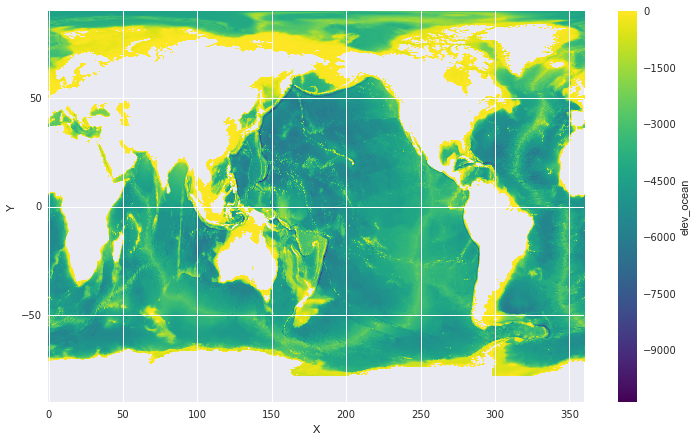

In [96]:
ax = plt.subplot(111)
ds = xray.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NGDC/.ETOPO5/dods')
ds['elev_ocean'] = ds.elev.where(ds.elev<0)
ds.elev_ocean.plot(ax=ax)
ax.set_ylim([-90,90])

In [99]:
# create a crude area weight factor based on assumption of spherical geometry
tot_area = (4 * np.pi * gsw.earth_radius**2)
dlon = np.radians((ds['X'][1]-ds['X'][0]).values)
dlat = np.radians((ds['Y'][1]-ds['Y'][0]).values)
ds['area'] = gsw.earth_radius**2 * dlon * dlat * np.cos(np.radians(ds.Y)) * (0*ds.elev + 1)
ds['area_ocean'] = ds.area.where(ds.elev<0)
ds.area.sum().values/tot_area # why not 100

-0.98819593571892395

How is the depth distributed? We can make a histogram of all the depths in the ocean (and on land) to visualize this.

(-10000, 6000)

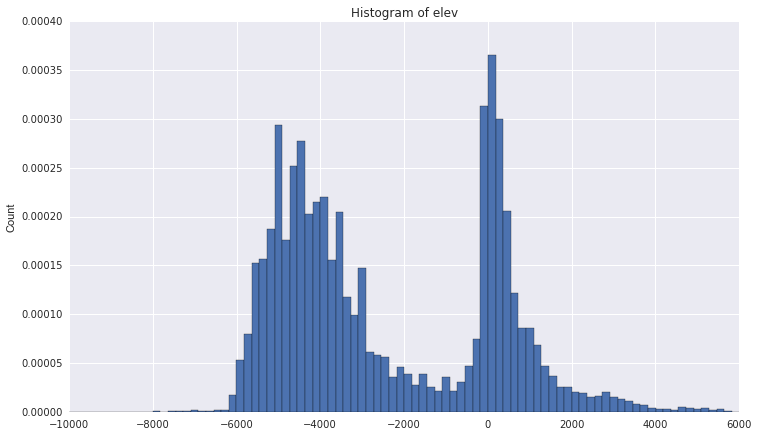

In [108]:
fig, ax = plt.subplots()
ds.elev.plot.hist(bins=100, weights=ds.area.values.ravel(), normed=True, ax=ax);
ax.set_xlim([-10000,6000])

Everything above zero is land. We can see that most of the ocean volume lies between 6000 and 3000 m depth.

In [103]:
print 'Fraction of Earth Covered by Ocean:', ds.area_ocean.sum().values/tot_area
print 'Mean Ocean Depth:', float((ds.elev_ocean*ds.area_ocean).sum()/ds.area_ocean.sum())
print 'Max Ocean Depth:', float(ds.elev_ocean.min())

Fraction of Earth Covered by Ocean: -0.717051254141
Mean Ocean Depth: -3658.79817919
Max Ocean Depth: -10376.0


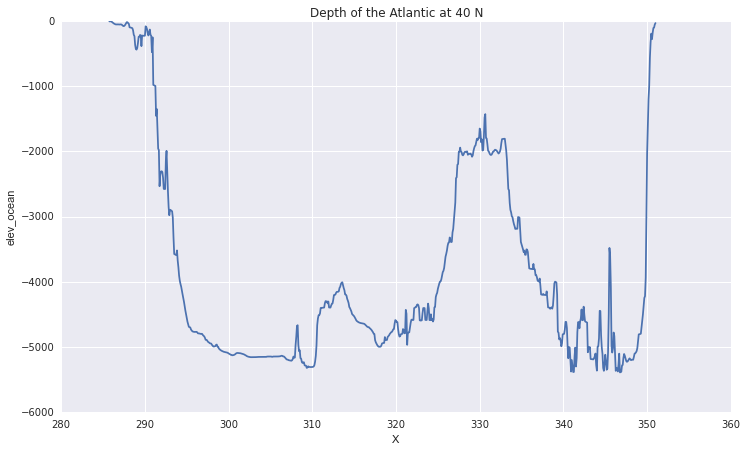

In [136]:
# a closer look
fig, ax = plt.subplots()
ds.elev_ocean.sel(Y=40, method='nearest').sel(X=slice(270,360)).plot(ax=ax)
ax.set_title('Depth of the Atlantic at 40 N')

This section reveals many of the common characteristics of ocean basins:

- A shallow continential shelf approx. 200m deep at the edge.
- An _abyss_ about 5000 m deep.
- A steep mid-ocean ridge in the center of the basin reaching 2000m depth.

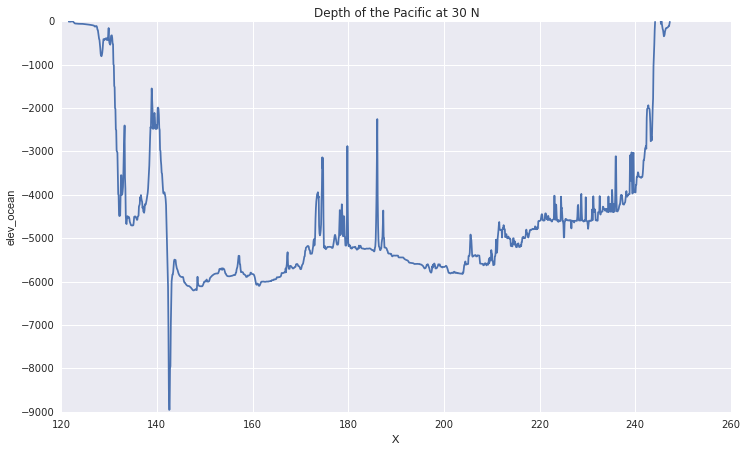

In [135]:
fig, ax = plt.subplots()
ds.elev_ocean.sel(Y=30, method='nearest').sel(X=slice(120,250)).plot(ax=ax)
ax.set_title('Depth of the Pacific at 30 N')

The Pacific looks similar in many ways. We also see the extremely deep Mariana trench at the Western edge of the basin. _What geophysical processes explain these features?_

(0, 360)

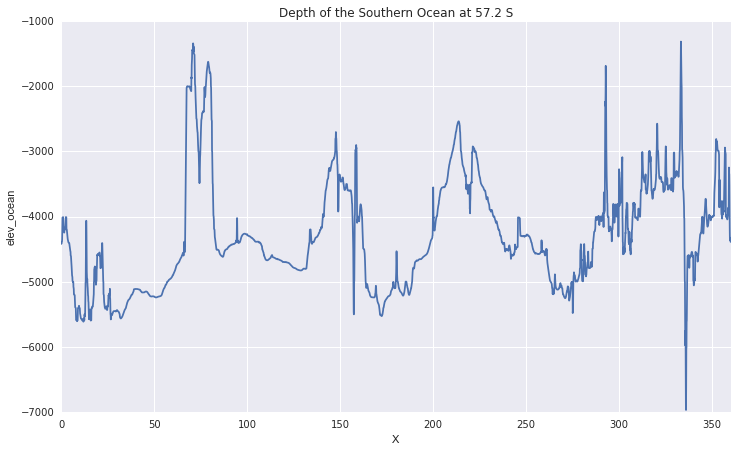

In [137]:
fig, ax = plt.subplots()
ds.elev_ocean.sel(Y=-57.2, method='nearest').plot(ax=ax)
ax.set_title('Depth of the Southern Ocean at 57.2 S')
ax.set_xlim([0,360])

The Southern Ocean is very different because there is a narrow range of latitudes at which no bathymetry reaches the surface. This has major consequeces for ocean circulation, which we will learn about later on in the course.